# <b> <u>Objective:</u></b>
To analyze the effectiveness of various marketing campaigns, track key performance indicators (KPIs), and provide actionable insights to optimize future marketing strategies.

# Importing Libraries, Data & Extracting Datset From Zip file

In [54]:
import zipfile
import pandas as pd

# Path to the zip file for the data set and also the dataset file name
zip_file_path = '/content/marketing_campaign_dataset.csv.zip'
csv_file_name = 'marketing_campaign_dataset.csv'

# Extract CSV file from the zip archive that i have attested
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('Dataset')

# Load the extracted CSV file into a DataFrame
extracted_csv_file_path = f'Dataset/{csv_file_name}'
df = pd.read_csv(extracted_csv_file_path)

# Display the first few rows of the DataFrame
print(df.head(10))

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   
5            6   DataTech Solutions       Display        All Ages  15 days   
6            7       NexGen Systems         Email     Women 35-44  60 days   
7            8   DataTech Solutions        Search       Men 18-24  45 days   
8            9    Alpha Innovations  Social Media     Women 35-44  15 days   
9           10             TechCorp         Email     Women 35-44  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Basic Analysis

In [30]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Day,Month,Year
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,1,1,2021
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2,1,2021
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,3,1,2021
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,4,1,2021
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,5,1,2021


In [55]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  int64  
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  float64
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Day               200000 non-null  int32  
 16  Month             20

From the data above, we can observe the following:
<li>
There are no missing values
<li>
There are 16 columns and 200000 rows
<li>
There are some categorical features in our data frame; as there are some
features in dtype: object).So we will need to encode them into numeric forms later.
</li>

# <b>Data Cleaning: Analysing Individual Columans & Fixing Data Types

In [ ]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
df['Duration'] = df['Duration'].str.replace(' days', '').astype(int)

In [34]:
# Summary statistics
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Day,Month,Year
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.0
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710,15.71997,6.525480,2021.0
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581,8.79633,3.447598,0.0
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,1.00000,1.000000,2021.0
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000,8.00000,4.000000,2021.0
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000,16.00000,7.000000,2021.0
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000,23.00000,10.000000,2021.0
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,31.00000,12.000000,2021.0


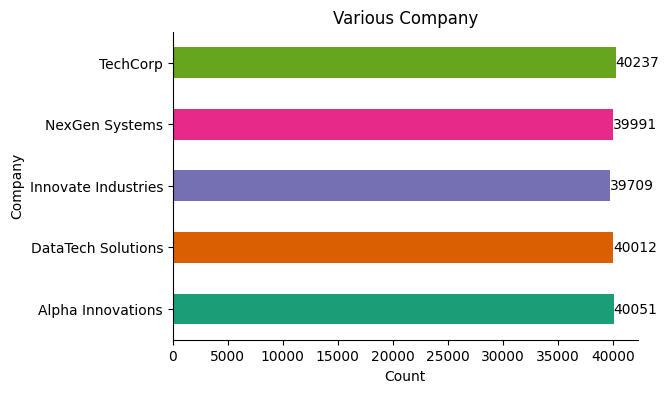

In [ ]:
Company = df["Company"].value_counts().sort_index()
# Plotting the bar graph
plt.figure(figsize=(6, 4))
ax = Company.plot(kind='barh', color=sns.color_palette('Dark2'))
# Add labels to each bar
for i in ax.patches:
    ax.annotate(str(int(i.get_width())),
                (i.get_width() + 1, i.get_y() + i.get_height() / 2),
                ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Company')
plt.title('Various Company')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

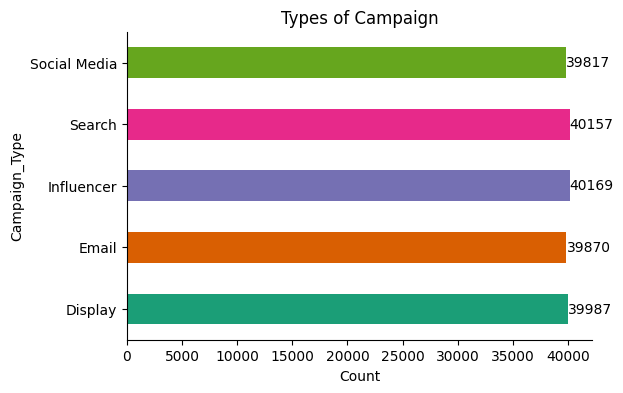

In [ ]:
Campaign = df["Campaign_Type"].value_counts().sort_index()
# Plotting the bar graph
plt.figure(figsize=(6, 4))
ax = Campaign.plot(kind='barh', color=sns.color_palette('Dark2'))

# Add labels to each bar
for i in ax.patches:
    ax.annotate(str(int(i.get_width())),
                (i.get_width() + 1, i.get_y() + i.get_height() / 2),
                ha='left', va='center')
plt.xlabel('Count')
plt.ylabel('Campaign_Type')
plt.title('Types of Campaign')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

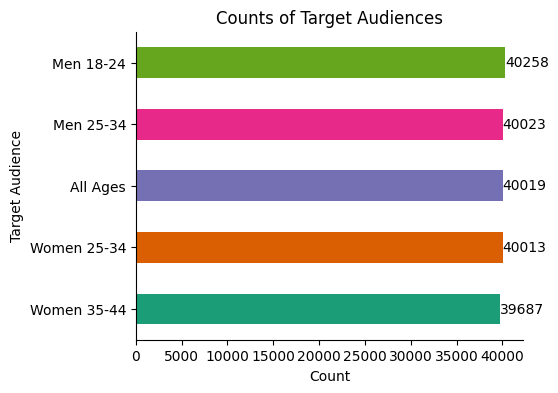

In [ ]:
target_audience_counts = df['Target_Audience'].value_counts().sort_values()

# Plotting the bar graph
plt.figure(figsize=(5,4))
ax = target_audience_counts.plot(kind='barh', color=sns.color_palette('Dark2'))
# Add labels to each bar
for i in ax.patches:
    ax.annotate(str(int(i.get_width())),
                (i.get_width() + 1, i.get_y() + i.get_height() / 2),
                ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Target Audience')
plt.title('Counts of Target Audiences')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

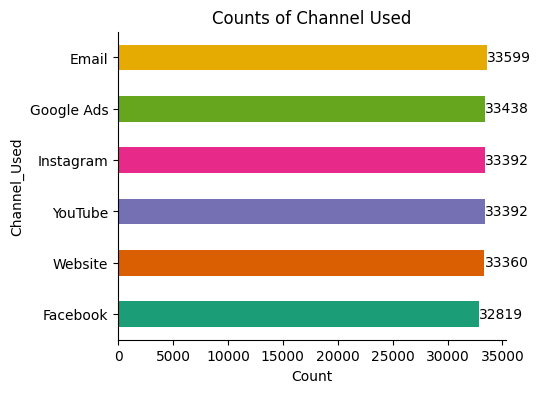

In [36]:
target_audience_counts = df['Channel_Used'].value_counts().sort_values()

# Plotting the bar graph
plt.figure(figsize=(5,4))
ax = target_audience_counts.plot(kind='barh', color=sns.color_palette('Dark2'))
# Add labels to each bar
for i in ax.patches:
    ax.annotate(str(int(i.get_width())),
                (i.get_width() + 1, i.get_y() + i.get_height() / 2),
                ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Channel_Used')
plt.title('Counts of Channel Used')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [37]:
# Unique values of 'Language'
languages = df['Language'].value_counts()
print("Total number of unique Languages:", languages)

Total number of unique Languages: Language
Mandarin    40255
Spanish     40102
German      39983
English     39896
French      39764
Name: count, dtype: int64


In [38]:
# Unique values of 'Customer_Segment'
customer_segments = df['Customer_Segment'].value_counts()
print("Total number of unique Customer Segments:\n", customer_segments)

Total number of unique Customer Segments:
 Customer_Segment
Foodies                40208
Tech Enthusiasts       40151
Outdoor Adventurers    40011
Health & Wellness      39888
Fashionistas           39742
Name: count, dtype: int64


In [39]:
# Convert 'Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used',
# 'Language', and'Customer_Segment'column to categorical dtype

to_convert = 'Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used','Language', 'Customer_Segment'

for i in to_convert:
    df[i]= df[i].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Campaign_ID       200000 non-null  int64   
 1   Company           200000 non-null  category
 2   Campaign_Type     200000 non-null  category
 3   Target_Audience   200000 non-null  category
 4   Duration          200000 non-null  int64   
 5   Channel_Used      200000 non-null  category
 6   Conversion_Rate   200000 non-null  float64 
 7   Acquisition_Cost  200000 non-null  float64 
 8   ROI               200000 non-null  float64 
 9   Location          200000 non-null  object  
 10  Language          200000 non-null  category
 11  Clicks            200000 non-null  int64   
 12  Impressions       200000 non-null  int64   
 13  Engagement_Score  200000 non-null  int64   
 14  Customer_Segment  200000 non-null  category
 15  Day               200000 non-null  int32   
 16  Mo

As you can see, the <b>columns Company, Campaign_Type, Target_Audience, Channel_Used, Language, and Customer_Segment </B>are now shown as the<b> category data type </b>in the DataFrame's information summary.

This conversion helps<b> optimize memory usage and enables more efficient operations</b> on categorical data.

# <b>Exploratory Data Analysis  </b>
Let's perform some exploratory data analysis (EDA) and create visualizations for the given dataset.

In [41]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Day,Month,Year
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,1,1,2021
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2,1,2021
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,3,1,2021
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,4,1,2021
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,5,1,2021


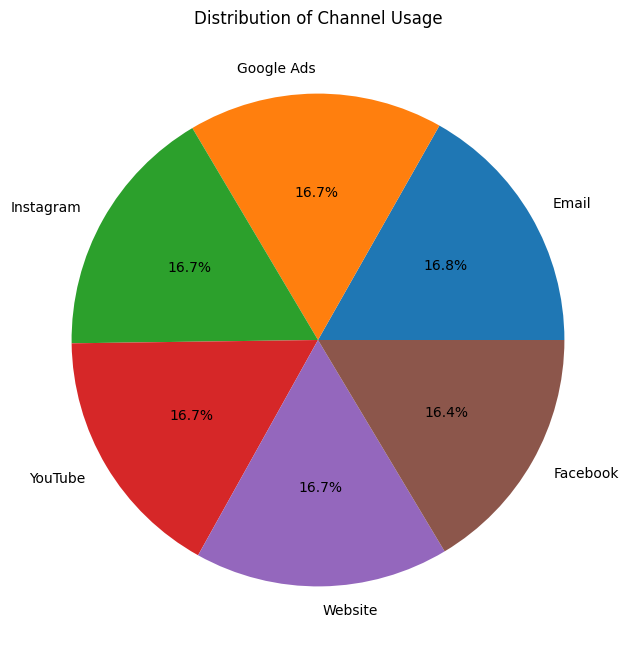

In [42]:
# Count the occurrences of each channel used
channel_counts = df['Channel_Used'].value_counts()

# Create a pie chart to visualize the distribution of channel usage
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

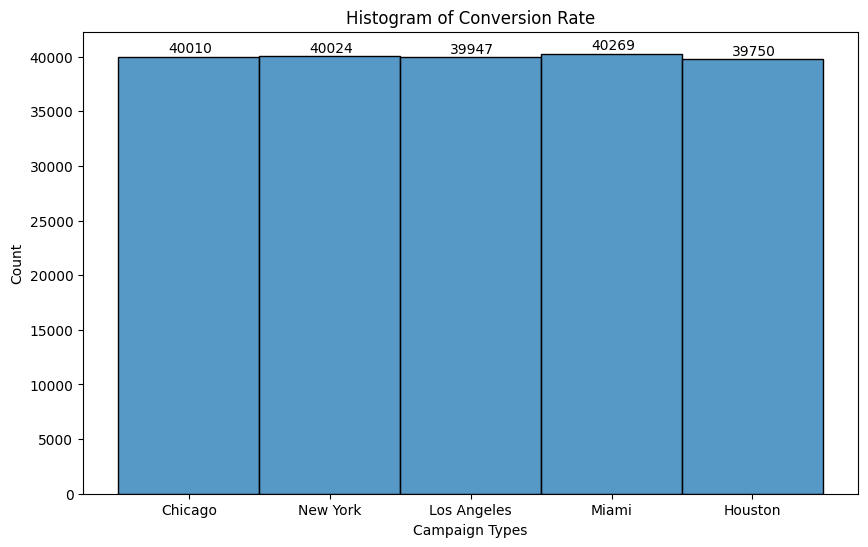

In [44]:
# Histogram of Conversion Rate
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Location')
plt.title('Histogram of Conversion Rate')
plt.xlabel('Campaign Types')
plt.ylabel('Count')
# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 6), textcoords='offset points')
plt.show()

<ipython-input-47-188b2f042d3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Campaign_Type', y='ROI', palette='Set2')


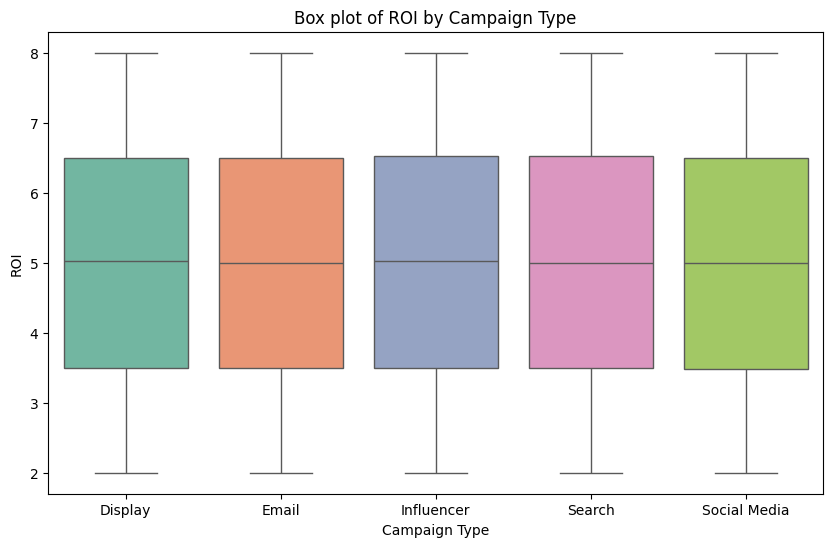

In [47]:
# Box plot of ROI by Campaign Type
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Campaign_Type', y='ROI', palette='Set2')
plt.title('Box plot of ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


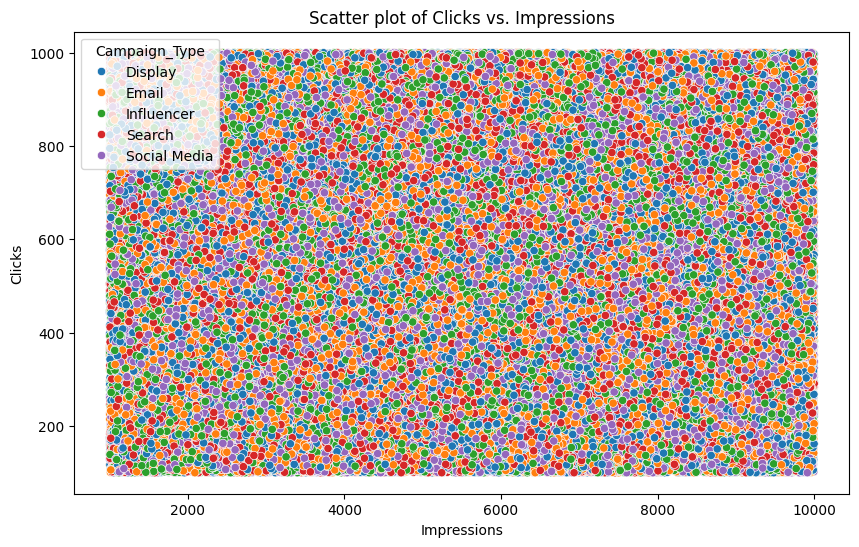

In [48]:
# Scatter plot of Clicks vs. Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Campaign_Type')
plt.title('Scatter plot of Clicks vs. Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

<ipython-input-50-4d93df819b5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Segment',  palette='Set2')


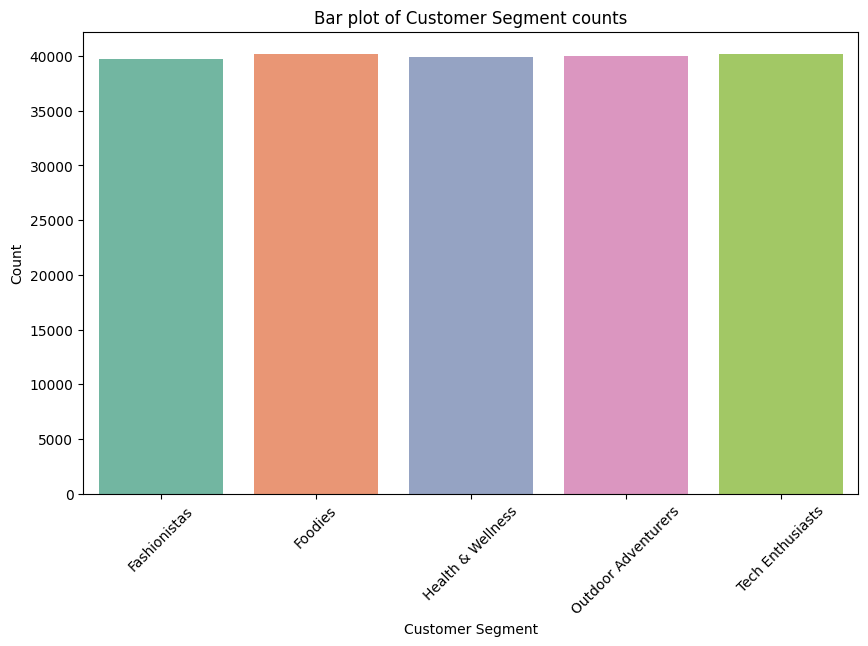

In [50]:
# Bar plot of Customer Segment counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Segment',  palette='Set2')
plt.title('Bar plot of Customer Segment counts')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

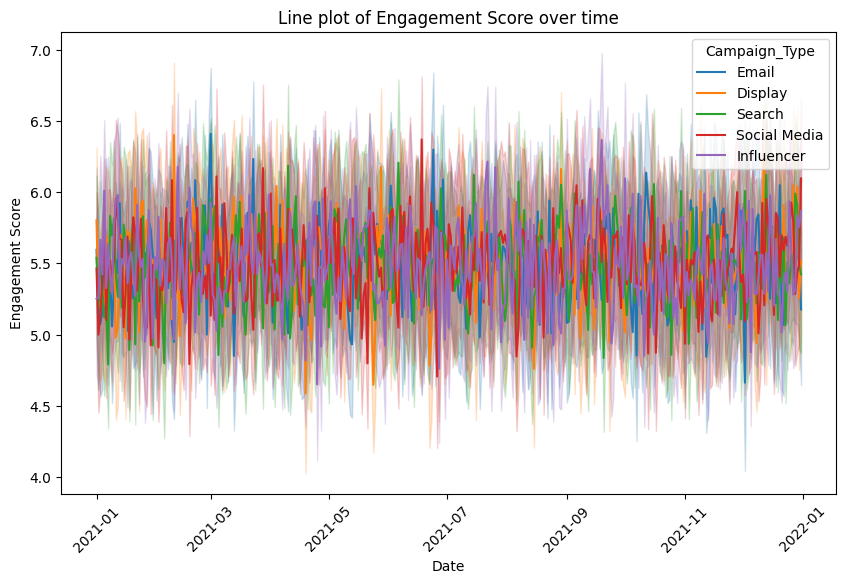

In [57]:
# Line plot of Engagement Score over time
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Date', y='Engagement_Score', hue='Campaign_Type')
plt.title('Line plot of Engagement Score over time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-61-7916bd59dc38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=location_conversion, x='Location', y='Conversion_Rate', palette='Set2')


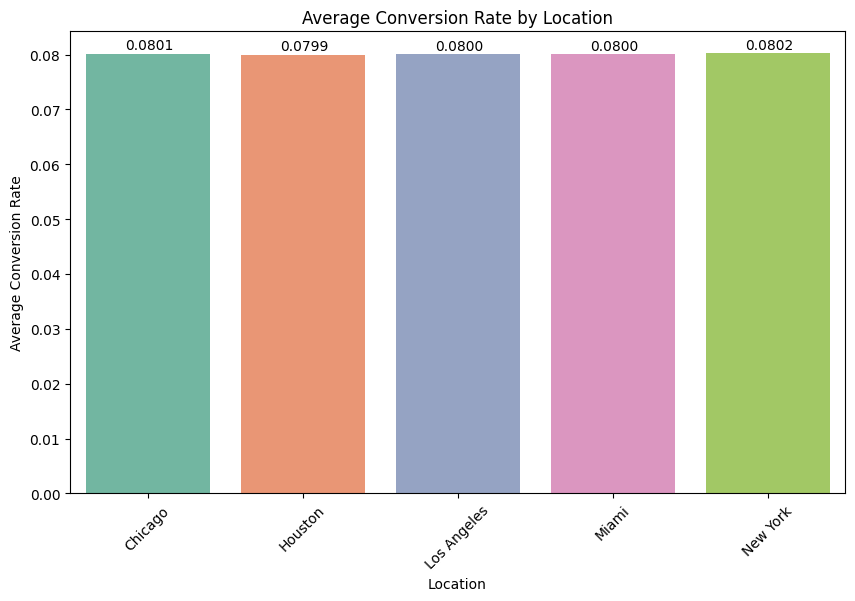

In [61]:
# Group data by location and calculate the average conversion rate
location_conversion = df.groupby('Location')['Conversion_Rate'].mean().reset_index()

# Create a map plot using the average conversion rate
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=location_conversion, x='Location', y='Conversion_Rate', palette='Set2')
plt.title('Average Conversion Rate by Location')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 6), textcoords='offset points')
plt.show()

<Figure size 1000x600 with 0 Axes>

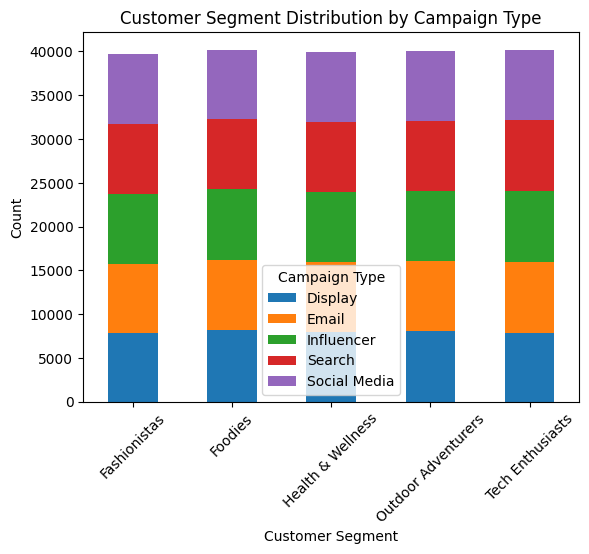

In [62]:
# Create a cross-tabulation of customer segments and campaign types
segment_campaign = pd.crosstab(df['Customer_Segment'], df['Campaign_Type'])

# Create a stacked bar chart to visualize the distribution of customer segments across campaign types
plt.figure(figsize=(10, 6))
segment_campaign.plot(kind='bar', stacked=True)
plt.title('Customer Segment Distribution by Campaign Type')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

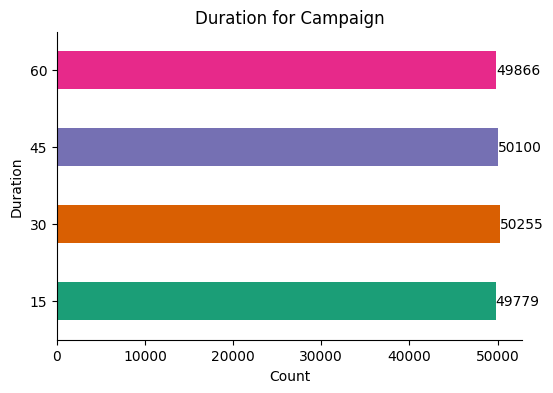

In [ ]:
duration = df["Duration"].value_counts().sort_index()
# Plotting the bar graph
plt.figure(figsize=(6, 4))
ax = duration.plot(kind='barh', color=sns.color_palette('Dark2'))

# Add labels to each bar
for i in ax.patches:
    ax.annotate(str(int(i.get_width())),
                (i.get_width() + 1, i.get_y() + i.get_height() / 2),
                ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Duration')
plt.title('Duration for Campaign')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

   Campaign_Type  Duration  Counts
12        Search        15    9803
17  Social Media        30    9886
11    Influencer        60    9914
6          Email        45    9927
16  Social Media        15    9931


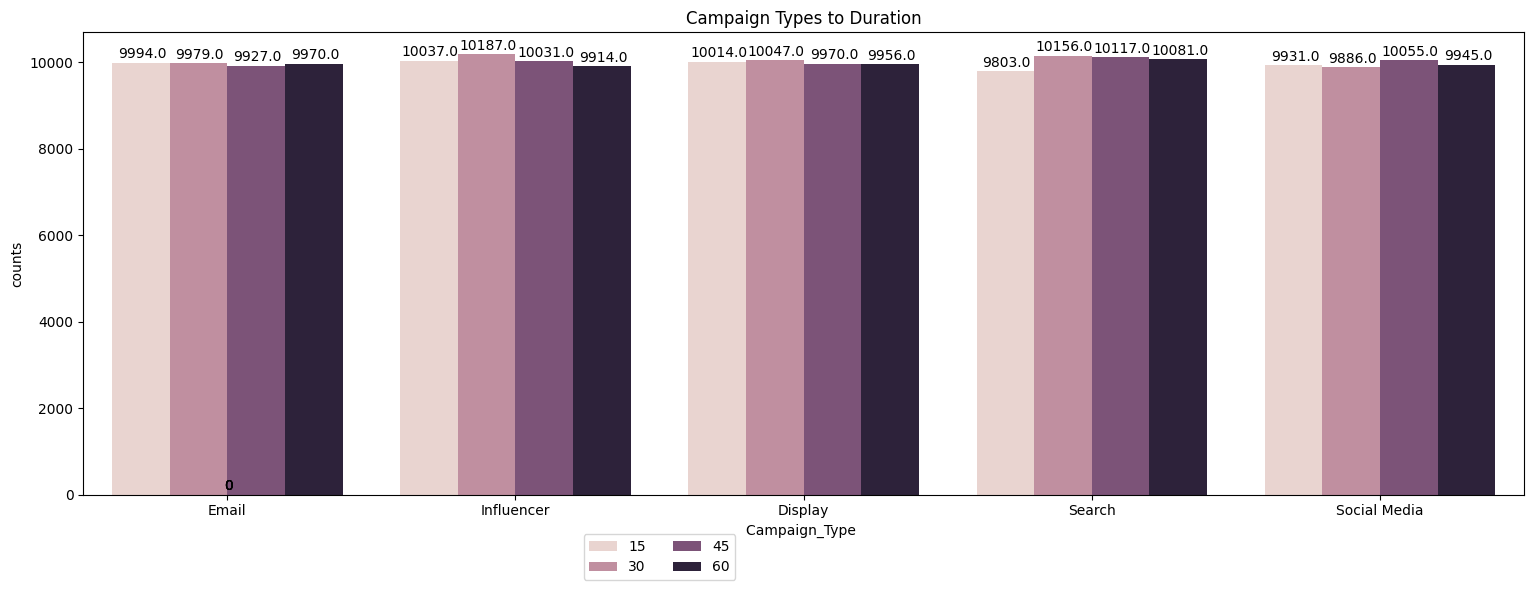

In [ ]:
# Calculate the counts of Campaign Types by Company
Campaign_Types_By_Company = df.groupby(['Campaign_Type', 'Duration']).size().reset_index(name='Counts').sort_values(by='Counts')
# Display the first few rows of the grouped data for verification
print(Campaign_Types_By_Company.head())
# Plotting the relationships
plt.figure(figsize=(30, 6))



# Plot 1: Campaign Type by Company
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Campaign_Type', hue='Duration')
plt.xlabel('Campaign_Type ')
plt.ylabel('counts')
plt.title('Campaign Types to Duration')
plt.xticks(rotation=0)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 6), textcoords='offset points')

# Move legend to the bottom
plt.legend(loc='lower center', bbox_to_anchor=(0.4, -0.2), ncol=2)

plt.tight_layout()
plt.show()

   Target_Audience  Duration  Counts
16     Women 35-44        15    9842
3         All Ages        60    9864
8        Men 25-34        15    9869
17     Women 35-44        30    9877
18     Women 35-44        45    9919


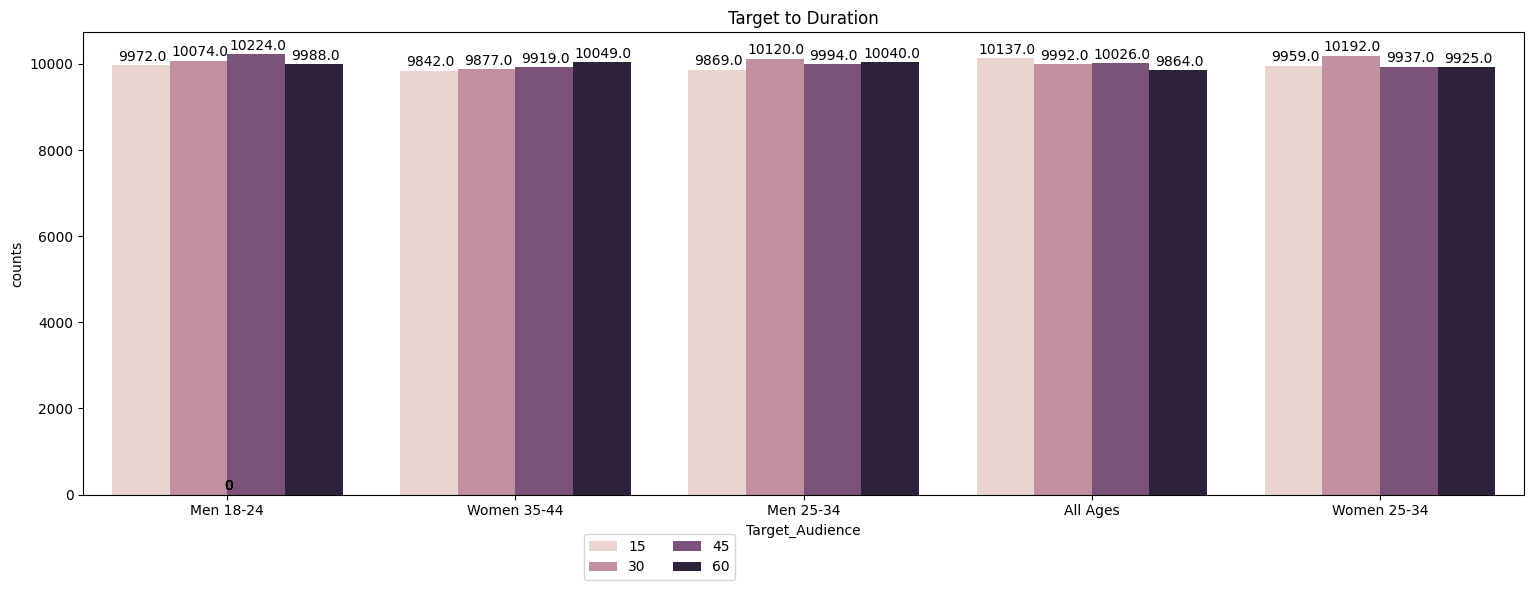

In [ ]:
# Calculate the counts of Campaign Types by Company
Campaign_Types_By_Company = df.groupby(['Target_Audience', 'Duration']).size().reset_index(name='Counts').sort_values(by='Counts', ascending = True)
# Display the first few rows of the grouped data for verification
print(Campaign_Types_By_Company.head())
# Plotting the relationships
plt.figure(figsize=(30, 6))



# Plot 1: Campaign Type by Company
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Target_Audience', hue='Duration')
plt.xlabel('Target_Audience')
plt.ylabel('counts')
plt.title('Target to Duration')
plt.xticks(rotation=0)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 6), textcoords='offset points')

# Move legend to the bottom
plt.legend(loc='lower center', bbox_to_anchor=(0.4, -0.2), ncol=2)

plt.tight_layout()
plt.show()

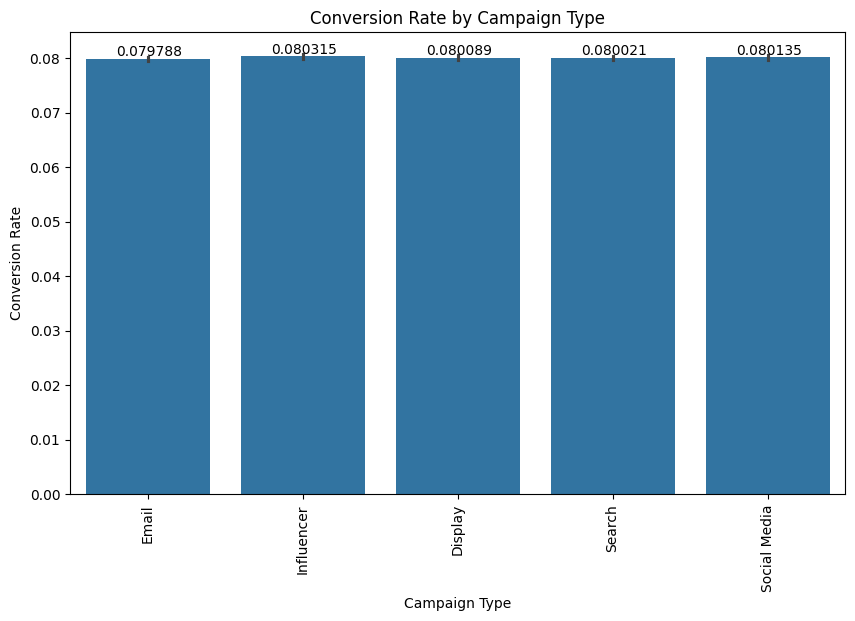

In [ ]:
# 1. Conversion Rate by Campaign Type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Campaign_Type', y='Conversion_Rate')
plt.title('Conversion Rate by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.6f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 5), textcoords='offset points')

plt.show()

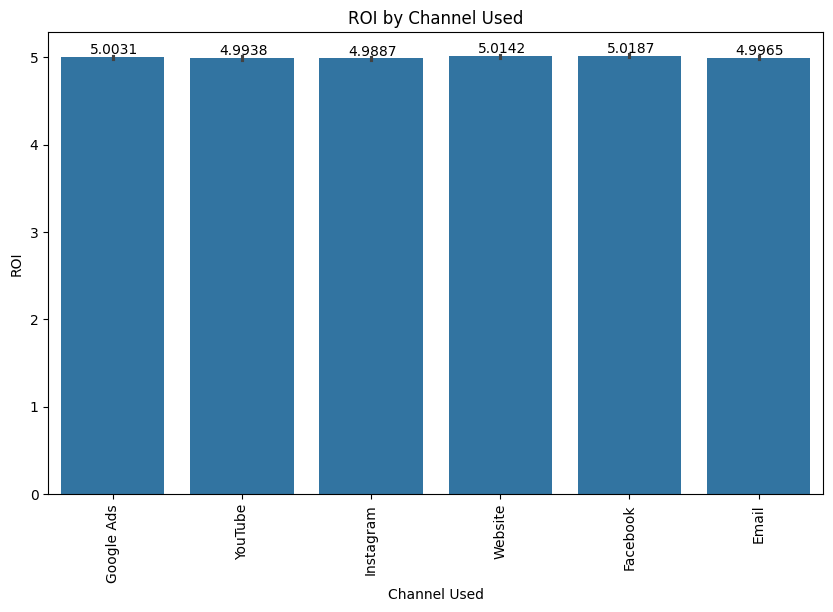

In [ ]:
# 2. ROI by Channel Used
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Channel_Used', y='ROI')
plt.title('ROI by Channel Used')
plt.xlabel('Channel Used')
plt.ylabel('ROI')
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 5), textcoords='offset points')
plt.show()

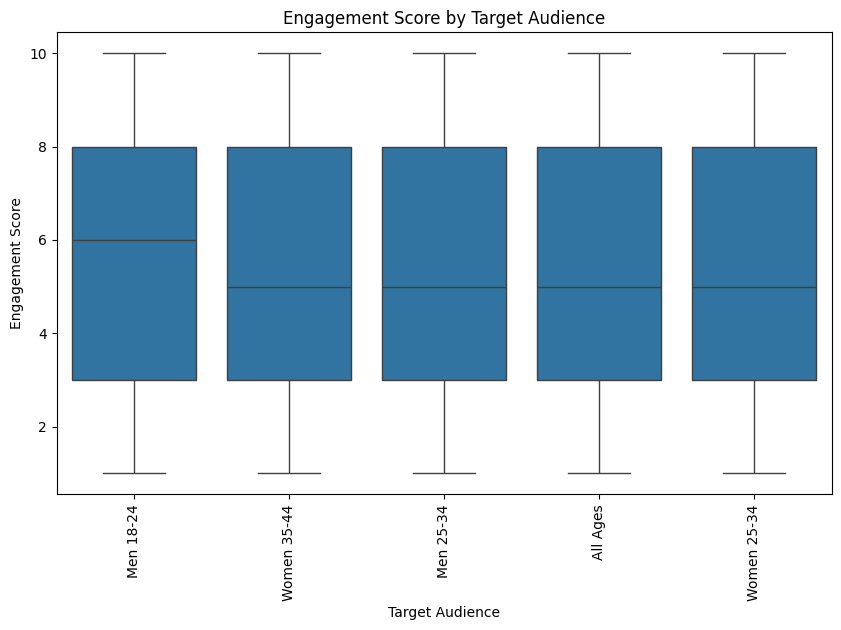

In [ ]:
# 3. Engagement Score by Target Audience
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Target_Audience', y='Engagement_Score')
plt.title('Engagement Score by Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Engagement Score')
plt.xticks(rotation=90)
plt.show()

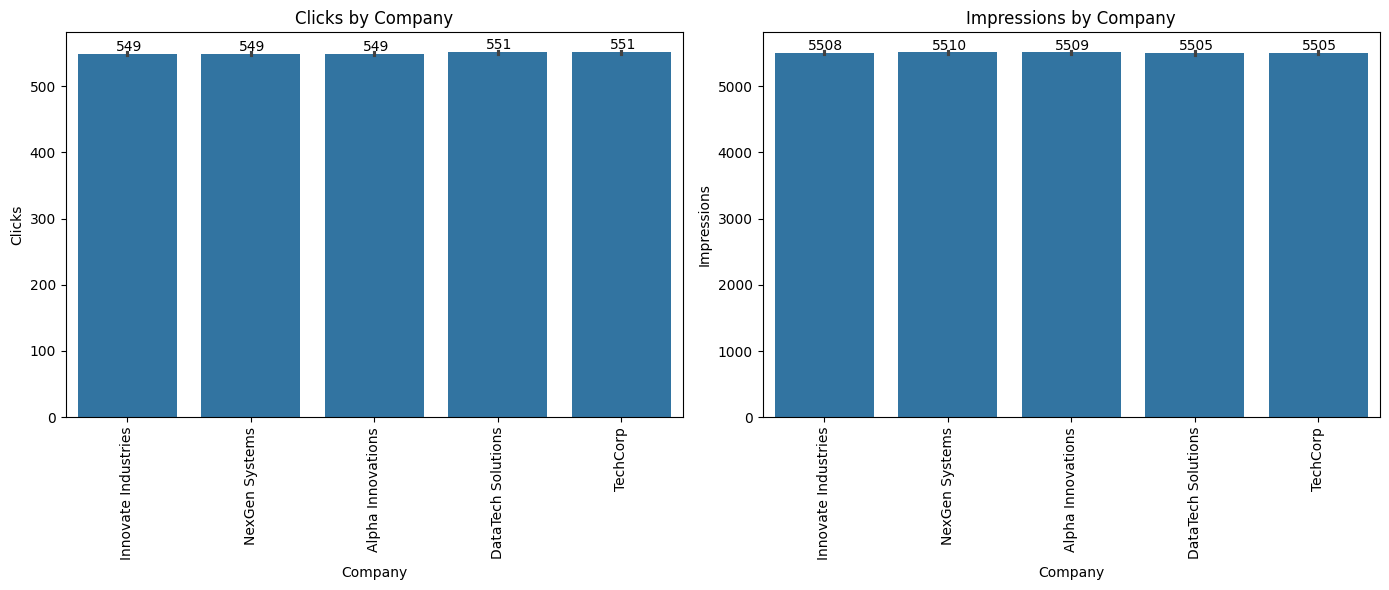

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Clicks by Company
sns.barplot(data=df, x='Company', y='Clicks', ax=ax[0])
ax[0].set_title('Clicks by Company')
ax[0].set_xlabel('Company')
ax[0].set_ylabel('Clicks')
ax[0].tick_params(axis='x', rotation=90)

# Add annotations for Clicks
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(1, 5), textcoords='offset points')

# Plot Impressions by Company
sns.barplot(data=df, x='Company', y='Impressions', ax=ax[1])
ax[1].set_title('Impressions by Company')
ax[1].set_xlabel('Company')
ax[1].set_ylabel('Impressions')
ax[1].tick_params(axis='x', rotation=90)

# Add annotations for Impressions
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(1, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# Conclusion

In this analysis, we explored the Marketing Campaign Performance Dataset and gained valuable insights into the effectiveness of various marketing campaigns.

Here are the key findings from the analysis:
<li>
Campaign Types: The dataset includes various campaign types such as email, social media, influencer, display, and search. Further analysis can be conducted to evaluate the performance of each campaign type and identify the most effective ones for different customer segments.
<li>
Target Audience: The dataset provides information about the specific audience segments targeted by the campaigns. Understanding the preferences and characteristics of different target audiences can help in tailoring marketing strategies to effectively engage and convert potential customers.
<li>
Channel Usage: The dataset includes information about the channels used to promote the campaigns, such as email, social media platforms, YouTube, websites, and Google Ads. Analyzing channel effectiveness can help in optimizing marketing efforts by focusing on the channels that generate higher conversion rates and engagement.
<li>
ROI and Acquisition Cost: The ROI (Return on Investment) and acquisition cost metrics provide insights into the profitability and cost-efficiency of the campaigns. By analyzing these metrics, marketers can identify the campaigns with the highest ROI and optimize their marketing budget allocation.
<li>
Customer Segments: The dataset categorizes campaigns based on specific customer segments such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, and outdoor adventurers. Understanding the preferences and behavior of different customer segments can aid in creating personalized and targeted marketing campaigns.

By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.

# <b> It is important to note that this analysis is based on a fictional dataset and should be further validated and customized based on the specific business context and objectives.